# Tutorial Machine Learning: Linear Regression

Selamat datang di tutorial tentang Linear Regression! Linear Regression adalah salah satu algoritma machine learning paling fundamental dan banyak digunakan untuk masalah prediksi numerik.

## Daftar Isi:
1. Pengenalan Linear Regression
   - Apa itu Linear Regression?
   - Jenis-jenis Linear Regression
   - Kapan menggunakan Linear Regression?
2. Konsep Matematika
   - Persamaan Linear
   - Metode Least Squares
   - Gradient Descent
3. Implementasi dengan Python
   - Simple Linear Regression
   - Multiple Linear Regression
4. Evaluasi Model
   - Metrics (R², MSE, MAE)
   - Residual Analysis
5. Studi Kasus
6. Latihan

Mari kita mulai!

## 1. Pengenalan Linear Regression

### Apa itu Linear Regression?
Linear Regression adalah metode statistik yang digunakan untuk memodelkan hubungan linear antara variabel dependen (target) dengan satu atau lebih variabel independen (fitur). 

### Jenis-jenis Linear Regression:
1. **Simple Linear Regression**: Menggunakan satu variabel independen
   - \[ y = mx + b \]
   - y: variabel dependen
   - x: variabel independen
   - m: slope (kemiringan)
   - b: intercept (titik potong)

2. **Multiple Linear Regression**: Menggunakan lebih dari satu variabel independen
   - \[ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \]
   - y: variabel dependen
   - x₁, x₂, ..., xₙ: variabel independen
   - b₀: intercept
   - b₁, b₂, ..., bₙ: koefisien regresi

### Kapan menggunakan Linear Regression?
- Ketika ingin memprediksi nilai numerik
- Ketika ada hubungan linear antara variabel
- Ketika data relatif bersih dan tidak memiliki banyak outlier
- Ketika ingin model yang mudah diinterpretasi

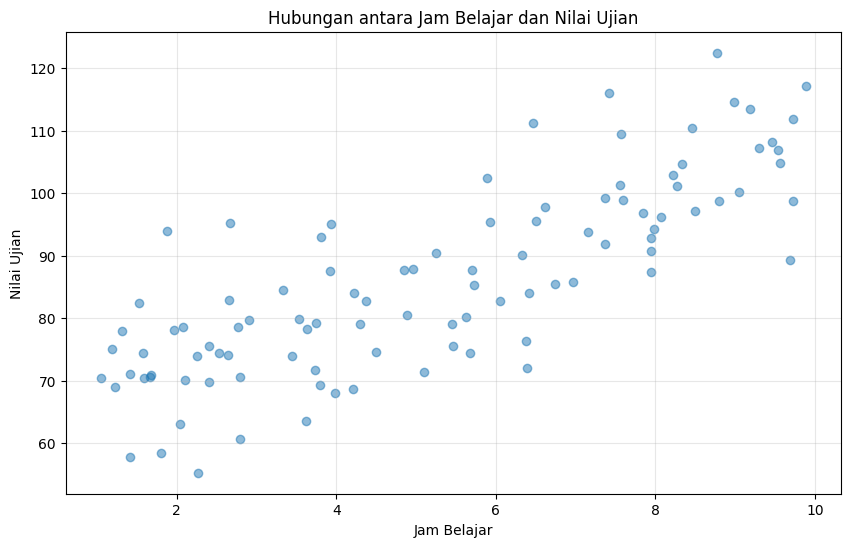

Sampel Data:
--------------------------------------------------
   Jam_Belajar  Nilai_Ujian
0     4.370861    82.724776
1     9.556429   104.792070
2     7.587945    98.857335
3     6.387926    72.063943
4     2.404168    69.824120

Statistik Deskriptif:
--------------------------------------------------
       Jam_Belajar  Nilai_Ujian
count       100.00       100.00
mean          5.23        86.15
std           2.68        15.03
min           1.05        55.27
25%           2.74        74.41
50%           5.18        84.31
75%           7.57        96.88
max           9.88       122.50


In [5]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Membuat data contoh untuk Simple Linear Regression
# Misalkan: Hubungan antara jam belajar (x) dengan nilai ujian (y)
X_simple = np.random.uniform(1, 10, 100)  # Jam belajar: 1-10 jam
y_simple = 60 + 5 * X_simple + np.random.normal(0, 10, 100)  # Nilai = 60 + 5*jam + noise

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.5)
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Hubungan antara Jam Belajar dan Nilai Ujian')
plt.grid(True, alpha=0.3)
plt.show()

# Tampilkan beberapa data sampel
df_simple = pd.DataFrame({'Jam_Belajar': X_simple, 'Nilai_Ujian': y_simple})
print("Sampel Data:")
print("-" * 50)
print(df_simple.head())

# Tampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print("-" * 50)
print(df_simple.describe().round(2))

## 2. Konsep Matematika

### Metode Least Squares
Metode Least Squares adalah teknik yang digunakan untuk menemukan garis regresi terbaik dengan meminimalkan jumlah kuadrat residual (selisih antara nilai prediksi dan nilai aktual).

Residual = \( y_i - \hat{y}_i \)
- yᵢ: nilai aktual
- ŷᵢ: nilai prediksi

Sum of Squared Residuals (SSR) = \( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \)

### Gradient Descent
Gradient Descent adalah algoritma optimasi yang digunakan untuk menemukan nilai parameter (koefisien) yang meminimalkan fungsi cost (error).

Langkah-langkah:
1. Inisialisasi parameter secara acak
2. Hitung gradient dari fungsi cost
3. Update parameter dengan formula:
   - \( \theta_{new} = \theta_{old} - \alpha \frac{\partial J}{\partial \theta} \)
   - α: learning rate
   - J: fungsi cost

Mari kita implementasikan konsep-konsep ini:

Koefisien (slope): 4.5541
Intercept: 61.8751

Persamaan regresi:
y = 61.8751 + 4.5541x


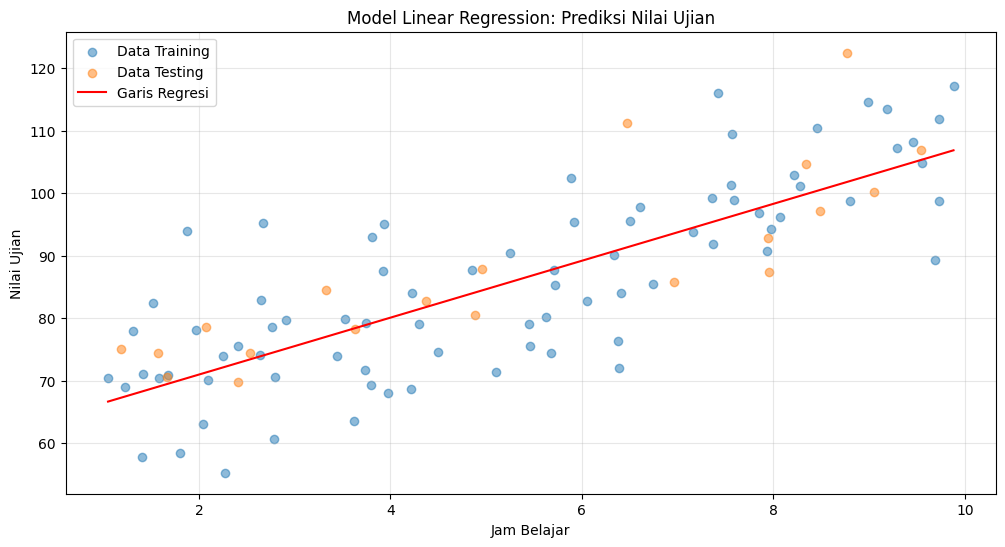


Metrik Evaluasi:
--------------------------------------------------
R² Score: 0.6791
Mean Squared Error: 65.3700
Root Mean Squared Error: 8.0852
Mean Absolute Error: 5.9134


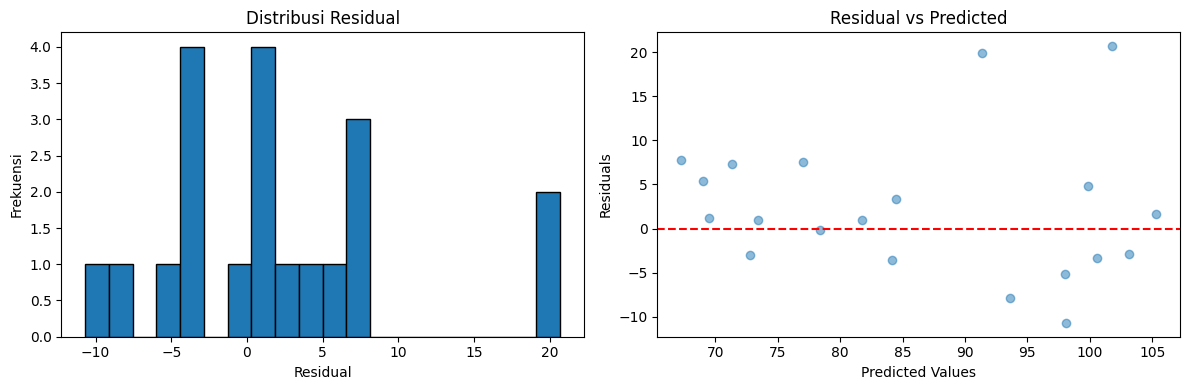

In [6]:
# Implementasi Simple Linear Regression

# Reshape data untuk sklearn
X = X_simple.reshape(-1, 1)
y = y_simple

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Buat prediksi
y_pred = model.predict(X_test)

# Tampilkan hasil
print("Koefisien (slope):", model.coef_[0].round(4))
print("Intercept:", model.intercept_.round(4))
print("\nPersamaan regresi:")
print(f"y = {model.intercept_.round(4)} + {model.coef_[0].round(4)}x")

# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Plot data training
plt.scatter(X_train, y_train, alpha=0.5, label='Data Training')
# Plot data testing
plt.scatter(X_test, y_test, alpha=0.5, label='Data Testing')

# Plot garis regresi
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', label='Garis Regresi')

plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Model Linear Regression: Prediksi Nilai Ujian')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluasi model
print("\nMetrik Evaluasi:")
print("-" * 50)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

# Analisis residual
residuals = y_test - y_pred

# Plot residual
plt.figure(figsize=(12, 4))

# Histogram residual
plt.subplot(121)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Plot residual vs predicted
plt.subplot(122)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## 3. Multiple Linear Regression

Multiple Linear Regression digunakan ketika kita memiliki lebih dari satu variabel independen. Mari kita buat contoh yang lebih kompleks dengan beberapa variabel:

- Jam belajar
- Kehadiran (dalam persen)
- Nilai tugas
- Nilai ujian sebelumnya

Kita akan memprediksi nilai ujian akhir berdasarkan variabel-variabel tersebut.

Sampel Data Multiple Linear Regression:
--------------------------------------------------
   Jam_Belajar  Kehadiran  Nilai_Tugas  Nilai_Sebelumnya  Nilai_Akhir
0     8.153302  80.679180    65.004709         85.322525    59.046420
1     5.523734  92.735383    86.652872         89.992942    65.921901
2     6.192135  70.431805    81.637632         89.915921    74.226794
3     5.432659  73.482179    63.539294         78.885793    57.530380
4     2.757187  71.380079    62.943738         84.224685    51.255690

Statistik Deskriptif:
--------------------------------------------------
       Jam_Belajar  Kehadiran  Nilai_Tugas  Nilai_Sebelumnya  Nilai_Akhir
count       100.00     100.00       100.00            100.00       100.00
mean          5.75      84.83        78.80             76.75        56.92
std           2.59       9.05        11.24              7.22         6.06
min           1.14      70.33        60.40             65.36        41.02
25%           3.63      77.81        69.67   

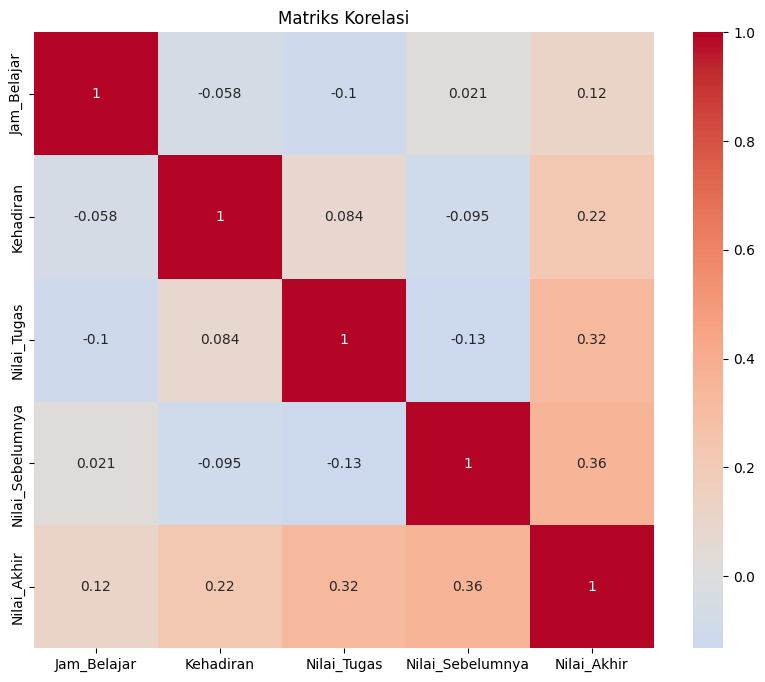


Koefisien untuk setiap variabel:
--------------------------------------------------
Jam_Belajar: 0.3896
Kehadiran: 0.2136
Nilai_Tugas: 0.1711
Nilai_Sebelumnya: 0.4046
Intercept: -8.0193

Metrik Evaluasi Model Multiple Linear Regression:
--------------------------------------------------
R² Score: -0.0762
Mean Squared Error: 28.2334
Root Mean Squared Error: 5.3135
Mean Absolute Error: 4.3869


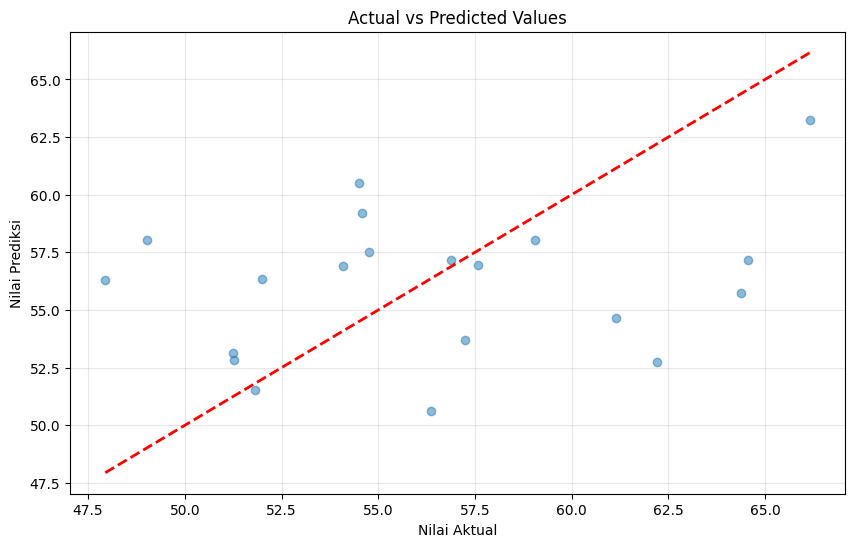

In [7]:
# Membuat dataset untuk Multiple Linear Regression
n_samples = 100

# Generate data
data = {
    'Jam_Belajar': np.random.uniform(1, 10, n_samples),
    'Kehadiran': np.random.uniform(70, 100, n_samples),
    'Nilai_Tugas': np.random.uniform(60, 95, n_samples),
    'Nilai_Sebelumnya': np.random.uniform(65, 90, n_samples)
}

# Hitung nilai ujian akhir (dengan noise)
nilai_akhir = (
    0.3 * data['Jam_Belajar'] +  # 30% pengaruh dari jam belajar
    0.2 * data['Kehadiran'] +    # 20% pengaruh dari kehadiran
    0.25 * data['Nilai_Tugas'] + # 25% pengaruh dari nilai tugas
    0.25 * data['Nilai_Sebelumnya'] + # 25% pengaruh dari nilai sebelumnya
    np.random.normal(0, 5, n_samples)  # noise
)

# Buat DataFrame
df_multiple = pd.DataFrame(data)
df_multiple['Nilai_Akhir'] = nilai_akhir

# Tampilkan sampel data
print("Sampel Data Multiple Linear Regression:")
print("-" * 50)
print(df_multiple.head())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print("-" * 50)
print(df_multiple.describe().round(2))

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_multiple.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()

# Implementasi Multiple Linear Regression
X_multi = df_multiple.drop('Nilai_Akhir', axis=1)
y_multi = df_multiple['Nilai_Akhir']

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Buat dan latih model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Buat prediksi
y_pred_multi = model_multi.predict(X_test_multi)

# Tampilkan koefisien
print("\nKoefisien untuk setiap variabel:")
print("-" * 50)
for feature, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_multi.intercept_:.4f}")

# Evaluasi model
print("\nMetrik Evaluasi Model Multiple Linear Regression:")
print("-" * 50)
print(f"R² Score: {r2_score(y_test_multi, y_pred_multi):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_multi, y_pred_multi)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_multi, y_pred_multi):.4f}")

# Visualisasi Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 
         'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Asumsi dan Keterbatasan Linear Regression

Linear Regression memiliki beberapa asumsi yang harus dipenuhi untuk mendapatkan hasil yang optimal:

1. **Linearitas**
   - Hubungan antara variabel independen dan dependen harus linear
   - Dapat dicheck dengan scatter plot atau residual plot

2. **Independensi**
   - Observasi harus independen satu sama lain
   - Tidak ada autokorelasi dalam data

3. **Homoscedasticity**
   - Varians residual harus konstan
   - Dapat dicheck dengan residual plot

4. **Normalitas**
   - Residual harus terdistribusi normal
   - Dapat dicheck dengan Q-Q plot atau histogram

5. **Multicollinearity**
   - Tidak ada korelasi yang kuat antar variabel independen
   - Dapat dicheck dengan VIF (Variance Inflation Factor)

Mari kita periksa asumsi-asumsi ini untuk model kita:

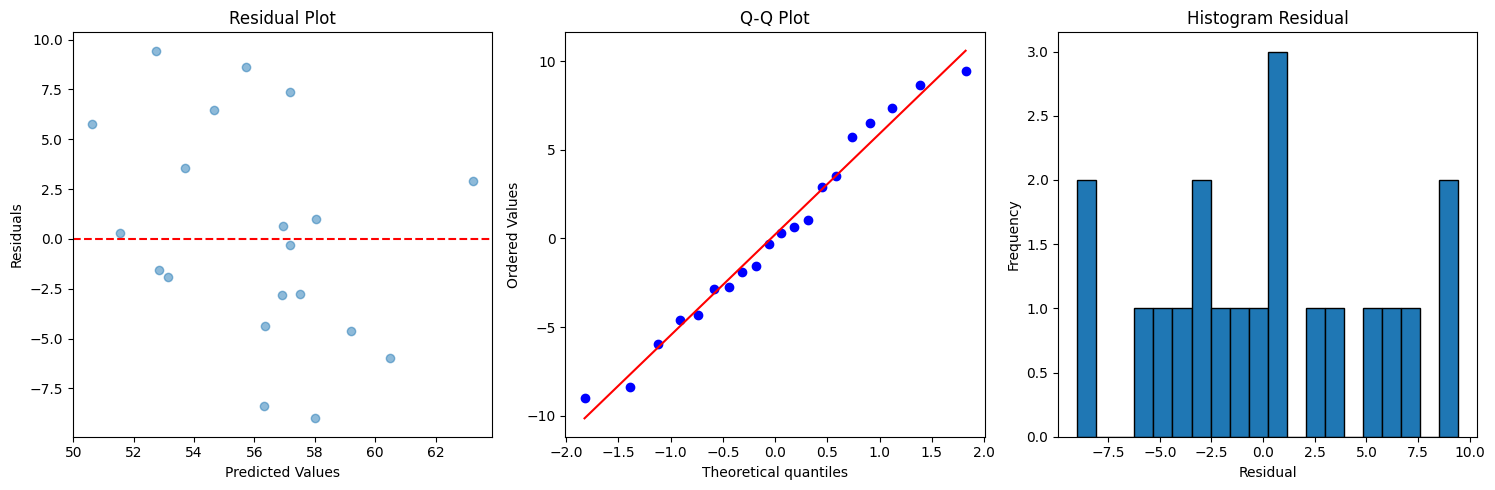


Variance Inflation Factor (VIF):
--------------------------------------------------
           Variable        VIF
0       Jam_Belajar   5.834985
1         Kehadiran  60.300900
2       Nilai_Tugas  40.812865
3  Nilai_Sebelumnya  55.947997

Korelasi antar variabel independen:
--------------------------------------------------
                  Jam_Belajar  Kehadiran  Nilai_Tugas  Nilai_Sebelumnya
Jam_Belajar             1.000     -0.058       -0.103             0.021
Kehadiran              -0.058      1.000        0.084            -0.095
Nilai_Tugas            -0.103      0.084        1.000            -0.132
Nilai_Sebelumnya        0.021     -0.095       -0.132             1.000


In [8]:
# Check asumsi-asumsi Linear Regression

# 1. Linearitas dan Homoscedasticity
residuals_multi = y_test_multi - y_pred_multi

plt.figure(figsize=(15, 5))

# Plot residual
plt.subplot(131)
plt.scatter(y_pred_multi, residuals_multi, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 2. Normalitas
plt.subplot(132)
from scipy import stats
stats.probplot(residuals_multi, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# 3. Histogram Residual
plt.subplot(133)
plt.hist(residuals_multi, bins=20, edgecolor='black')
plt.title('Histogram Residual')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("\nVariance Inflation Factor (VIF):")
print("-" * 50)
print(calculate_vif(X_multi))

# Correlation matrix untuk check multicollinearity
print("\nKorelasi antar variabel independen:")
print("-" * 50)
correlation_matrix = X_multi.corr()
print(correlation_matrix.round(3))

## 5. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Buat model Linear Regression untuk memprediksi nilai ujian dengan:
   - Hanya menggunakan Jam_Belajar
   - Menggunakan Jam_Belajar dan Kehadiran
   - Menggunakan semua variabel
   Bandingkan performa ketiga model tersebut.

2. Implementasikan K-Fold Cross Validation untuk model Multiple Linear Regression dan analisis hasilnya.

3. Lakukan feature engineering:
   - Buat fitur baru dari kombinasi fitur yang ada
   - Transformasi fitur (misalnya: log, square, etc.)
   - Bandingkan performa model sebelum dan sesudah feature engineering

4. Implementasikan Polynomial Regression dan bandingkan dengan Linear Regression biasa.

5. Buat fungsi untuk mendeteksi dan menangani outlier, kemudian bandingkan performa model:
   - Sebelum penanganan outlier
   - Setelah penanganan outlier

## Kesimpulan

Linear Regression adalah algoritma fundamental dalam machine learning yang sangat berguna untuk:
1. Memprediksi nilai numerik
2. Memahami hubungan antar variabel
3. Mengidentifikasi faktor-faktor yang mempengaruhi variabel target

Kelebihan:
- Mudah diimplementasikan dan diinterpretasi
- Komputasi yang efisien
- Basis untuk model yang lebih kompleks

Keterbatasan:
- Asumsi linearitas
- Sensitif terhadap outlier
- Tidak cocok untuk hubungan non-linear
- Dapat mengalami overfitting atau underfitting

Berikut adalah template kode untuk latihan:

In [9]:
# Template untuk latihan

# Soal 1: Perbandingan Model
def compare_models(X, y):
    # Lengkapi kode di sini...
    pass

# Soal 2: K-Fold Cross Validation
from sklearn.model_selection import KFold, cross_val_score
def implement_cross_validation(X, y, k=5):
    # Lengkapi kode di sini...
    pass

# Soal 3: Feature Engineering
def create_new_features(df):
    # Lengkapi kode di sini...
    pass

# Soal 4: Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
def implement_polynomial_regression(X, y, degree=2):
    # Lengkapi kode di sini...
    pass

# Soal 5: Outlier Detection and Handling
def handle_outliers(df, columns, method='zscore'):
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas dengan dataset kita
# compare_models(X_multi, y_multi)
# implement_cross_validation(X_multi, y_multi)
# df_new_features = create_new_features(df_multiple)
# implement_polynomial_regression(X_multi, y_multi)
# df_no_outliers = handle_outliers(df_multiple, ['Jam_Belajar', 'Nilai_Tugas'])